In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
import joblib

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
#core_weather = pd.read_csv("local_weather.csv",parse_dates=["DATE"], index_col=["DATE"])

In [2]:
core_weather = pd.read_csv("locale_weather.csv")

In [3]:
core_weather["DATE"]=pd.to_datetime(core_weather["DATE"])

In [ ]:
core_weather.index

In [ ]:
core_weather.columns

In [4]:
core_weather = core_weather[["DATE","PRCP","TMAX","TMIN"]].copy()

In [5]:
core_weather.columns = ["ds","precip","y","temp_min"]

In [ ]:
core_weather

In [6]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [7]:
core_weather = core_weather.ffill()

In [19]:
target = core_weather

In [20]:
target = target[["ds","y","precip","temp_min"]]

In [17]:
target = target[["ds","y"]]

In [21]:
target

,ds,y,precip,temp_min
0,1960-01-01,49.0,0.0,30.0
1,1960-01-02,49.0,0.0,29.0
2,1960-01-03,54.0,0.0,35.0
3,1960-01-04,54.0,0.0,36.0
4,1960-01-05,55.0,0.0,33.0
...,...,...,...,...
17457,2023-09-18,73.0,0.0,60.0
17458,2023-09-19,70.0,0.0,60.0
17459,2023-09-20,71.0,0.0,60.0
17460,2023-09-21,72.0,0.0,55.0


In [22]:
target.apply(pd.isnull).sum()/target.shape[0]

ds          0.0
y           0.0
precip      0.0
temp_min    0.0
dtype: float64

In [16]:
m=NeuralProphet()
m.set_plotting_backend("matplotlib")
#train, val = m.split_df(target, valid_p=0.2)
m.add_lagged_regressor('precip')
m.add_lagged_regressor('temp_min')
print("Dataset size:", len(target))
# print("Train dataset size:", len(train))
# print("Validation dataset size:", len(val))

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1


Dataset size: 17462


In [15]:
temp=NeuralProphet()
temp.set_plotting_backend("matplotlib")
temp.fit(target,freq='D',epochs=1000)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
Finding best initial lr: 100%|██████████| 256/256 [00:00<00:00, 291.40it/s]


Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 1461.30it/s, loss=0.0064, v_num=27, MAE=4.340, RMSE=5.790, Loss=0.00704, RegLoss=0.000]   


,MAE,RMSE,Loss,RegLoss,epoch
0,42.861038,51.529606,0.454359,0.0,0
1,36.092918,43.528538,0.343877,0.0,1
2,30.118811,36.305279,0.251253,0.0,2
3,25.034962,30.057095,0.178141,0.0,3
4,20.951235,24.970369,0.124992,0.0,4
...,...,...,...,...,...
995,4.345111,5.789638,0.007036,0.0,995
996,4.345451,5.786946,0.007037,0.0,996
997,4.344965,5.787684,0.007035,0.0,997
998,4.344975,5.793279,0.007035,0.0,998


In [23]:
m.fit(target,freq='D',epochs= 1098)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64


Finding best initial lr:   0%|          | 0/256 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,51.630402,61.641125,0.624132,0.0,0
1,44.004833,52.696667,0.492312,0.0,1
2,36.830830,44.288841,0.372305,0.0,2
3,30.307878,36.691586,0.269466,0.0,3
4,24.786619,30.299797,0.188911,0.0,4
...,...,...,...,...,...
1093,4.234916,5.654450,0.006743,0.0,1093
1094,4.234895,5.660828,0.006745,0.0,1094
1095,4.234705,5.658822,0.006743,0.0,1095
1096,4.234891,5.655067,0.006752,0.0,1096


In [24]:
df_future1 = m.make_future_dataframe(target, n_historic_predictions=True, periods=900)
forecast1 = m.predict(df_future1)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 273it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [16]:
df_future1 = temp.make_future_dataframe(target, n_historic_predictions=True, periods=10)
forecast1 = temp.predict(df_future1)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 18/18 [00:00<00:00, 218.88it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [25]:
forecast1

,ds,y,yhat1,lagged_regressor_precip1,lagged_regressor_temp_min1,trend,season_yearly,season_weekly
0,1960-01-01,49.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-01-02,49.0,54.685722,-0.710098,8.237474,54.701759,-7.406426,-0.136987
2,1960-01-03,54.0,54.562614,-0.685612,7.953424,54.699406,-7.371925,-0.032677
3,1960-01-04,54.0,56.367222,-0.832529,9.657729,54.697052,-7.332306,0.177274
4,1960-01-05,55.0,56.658302,-0.857015,9.941780,54.694702,-7.287792,0.166628
...,...,...,...,...,...,...,...,...
17458,2023-09-19,70.0,77.349007,-1.444683,16.759001,55.342888,6.525175,0.166628
17459,2023-09-20,71.0,77.262115,-1.444683,16.759001,55.343143,6.520152,0.084501
17460,2023-09-21,72.0,77.066254,-1.444683,16.759001,55.343399,6.509320,-0.100778
17461,2023-09-22,70.0,75.694870,-1.322252,15.338746,55.343655,6.492684,-0.157962


In [26]:
filename = 'np_tempo.sav'
joblib.dump(m, filename)

: 

In [ ]:
filename = 'np_reg_precip.sav'
#joblib.dump(tp, filename)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


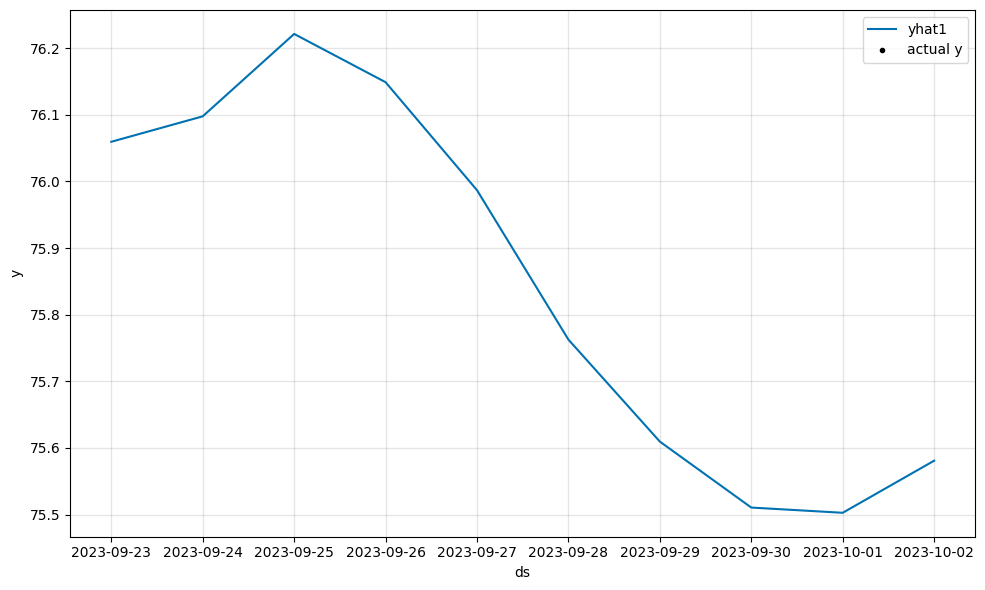

In [19]:
temp.plot(forecast1[-10:])

In [ ]:
m.plot_components(forecast1[-365:])

In [ ]:
forecast1[-365:]

In [ ]:
filename = 'np_model2.sav'
joblib.dump(m, filename)

In [ ]:
filename = 'np_model2.sav'
main_model = joblib.load(filename)

In [ ]:
target.to_csv("data.csv",index=False)

In [ ]:
target_precip = target[['ds','precip']]

In [ ]:
target_precip

In [ ]:
target_precip.columns = ["ds","y"]
tp = NeuralProphet()
tp.set_plotting_backend("matplotlib")
metrics = tp.fit(target_precip,freq='D',epochs= 100)

In [ ]:
filename = 'np_reg_precip.sav'
joblib.dump(tp, filename)

In [ ]:
metrics

In [ ]:
target_tmin = target[['ds','temp_min']]
target_tmin.columns = ["ds","y"]
tm = NeuralProphet()
tm.set_plotting_backend("matplotlib")
metrics = tm.fit(target_tmin,freq='D',epochs= 100)

In [ ]:
filename = 'np_reg_tmin.sav'
joblib.dump(tm, filename)

In [ ]:
future_precip=tp.make_future_dataframe(target_precip,n_historic_predictions=True,periods=365)
fcst_precip = tp.predict(future_precip)
fcst_precip[-355:]

In [ ]:
future_tmin=tm.make_future_dataframe(target_tmin,n_historic_predictions=True,periods=365)
fcst_tmin = tm.predict(future_tmin)
fcst_tmin[-365:]

In [ ]:
regressors=["ds","yhat1"]
future=fcst_precip.loc[:,regressors].copy()

In [ ]:
future.columns = [['ds','precip']]

In [ ]:
future

In [ ]:
df_future4=pd.concat([future,fcst_tmin['yhat1'].reindex(future.index)],axis=1)
df_future4.columns=["ds","precip","temp_min"]

In [ ]:
df_future4["y"]=None

In [ ]:
df_future4.loc[df_future4['y'].isnull(),df_future4['y']] = target['y'].values

In [ ]:
df_future4 = m.make_future_dataframe(df_future4, n_historic_predictions=True, periods=365)
forecast4 = m.predict(df_future4)